In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import scipy.stats as st


import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a file path
filepath = 'Resources/storms_final.csv'

# Read in the data. 
storms_df = pd.read_csv(filepath)

storms_df.head()

,name,combined_date,year,month,day,hour,lat,long,status,category,wind,pressure
0,AL011852,1852-08-26,1852,8,26,6,30.2,-88.6,hurricane,3,100,961
1,AL031853,1853-09-03,1853,9,3,12,19.7,-56.2,hurricane,4,130,924
2,AL031854,1854-09-07,1854,9,7,12,28.0,-78.6,hurricane,3,110,938
3,AL031854,1854-09-08,1854,9,8,18,31.6,-81.1,hurricane,3,100,950
4,AL031854,1854-09-08,1854,9,8,20,31.7,-81.1,hurricane,3,100,950


In [4]:
storms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17786 entries, 0 to 17785
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           17786 non-null  object 
 1   combined_date  17786 non-null  object 
 2   year           17786 non-null  int64  
 3   month          17786 non-null  int64  
 4   day            17786 non-null  int64  
 5   hour           17786 non-null  int64  
 6   lat            17786 non-null  float64
 7   long           17786 non-null  float64
 8   status         17786 non-null  object 
 9   category       17786 non-null  int64  
 10  wind           17786 non-null  int64  
 11  pressure       17786 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.6+ MB


In [5]:
storms_df['combined_date'] = storms_df.apply(lambda x: pd.to_datetime(f"{x['year']}-{x['month']}-{x['day']}", format='%Y-%m-%d'), axis=1)

In [6]:
storms_df.head()

,name,combined_date,year,month,day,hour,lat,long,status,category,wind,pressure
0,AL011852,1852-08-26,1852,8,26,6,30.2,-88.6,hurricane,3,100,961
1,AL031853,1853-09-03,1853,9,3,12,19.7,-56.2,hurricane,4,130,924
2,AL031854,1854-09-07,1854,9,7,12,28.0,-78.6,hurricane,3,110,938
3,AL031854,1854-09-08,1854,9,8,18,31.6,-81.1,hurricane,3,100,950
4,AL031854,1854-09-08,1854,9,8,20,31.7,-81.1,hurricane,3,100,950


In [7]:
storms_df.drop(['tropicalstorm_force_diameter', 'hurricane_force_diameter'], axis=1, inplace=True)

KeyError: "['tropicalstorm_force_diameter', 'hurricane_force_diameter'] not found in axis"

In [ ]:
storms_df.head()

In [ ]:
new_columns = ['name', 'combined_date', 'year', 'month', 'day', 'hour', 'lat', 'long', 'status', 'category', 'wind', 'pressure']
storms_df = storms_df[new_columns]
storms_df.head()

In [8]:
storms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17786 entries, 0 to 17785
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           17786 non-null  object        
 1   combined_date  17786 non-null  datetime64[ns]
 2   year           17786 non-null  int64         
 3   month          17786 non-null  int64         
 4   day            17786 non-null  int64         
 5   hour           17786 non-null  int64         
 6   lat            17786 non-null  float64       
 7   long           17786 non-null  float64       
 8   status         17786 non-null  object        
 9   category       17786 non-null  int64         
 10  wind           17786 non-null  int64         
 11  pressure       17786 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 1.6+ MB


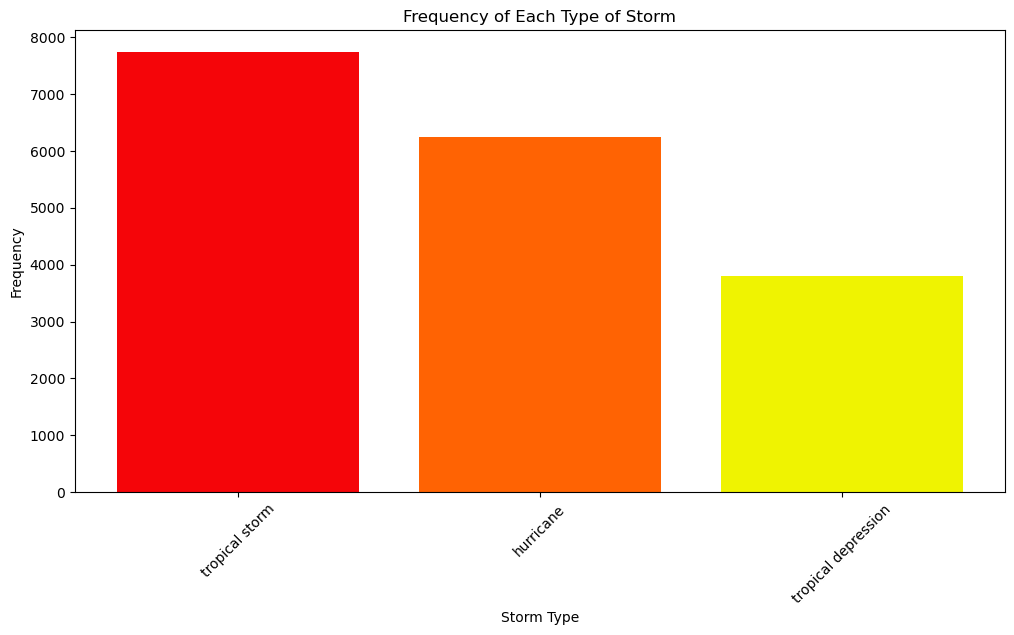

In [9]:
# Count the frequency of each status
status_counts = storms_df['status'].value_counts()

# Define the custom colors
colors = ['#f50509', '#ff6303', '#eff301']

# Plotting the bar graph with custom colors
plt.figure(figsize=(12, 6))
plt.bar(status_counts.index, status_counts.values, color=colors)
plt.title('Frequency of Each Type of Storm')
plt.xlabel('Storm Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

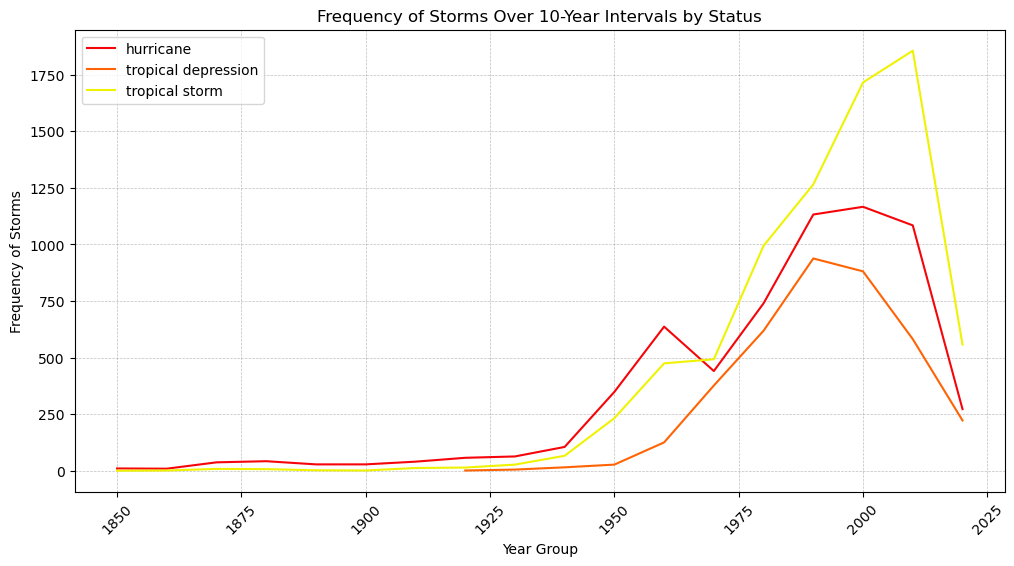

In [10]:
# Group data by 10-year intervals
storms_df['year_group'] = (storms_df['year'] // 10) * 10

# Calculate frequency of storms by status and year group
storm_frequency_by_status = storms_df.groupby(['year_group', 'status']).size().unstack()

# Define custom colors for each status
colors = ['#f50509', '#ff6303', '#eff301']

# Plotting the line graph for frequency of storms over 10-year intervals with different lines for each status and custom colors
plt.figure(figsize=(12, 6))
for i, status in enumerate(storm_frequency_by_status.columns):
    plt.plot(storm_frequency_by_status.index, storm_frequency_by_status[status], label=status, color=colors[i])

plt.title('Frequency of Storms Over 10-Year Intervals by Status')
plt.xlabel('Year Group')
plt.ylabel('Frequency of Storms')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

/var/folders/4r/1qb0cvl95xl13_sqyl2vvzvm0000gn/T/ipykernel_3288/1328808853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year_group'] = (filtered_data['year'] // 10) * 10


<Figure size 1200x600 with 0 Axes>

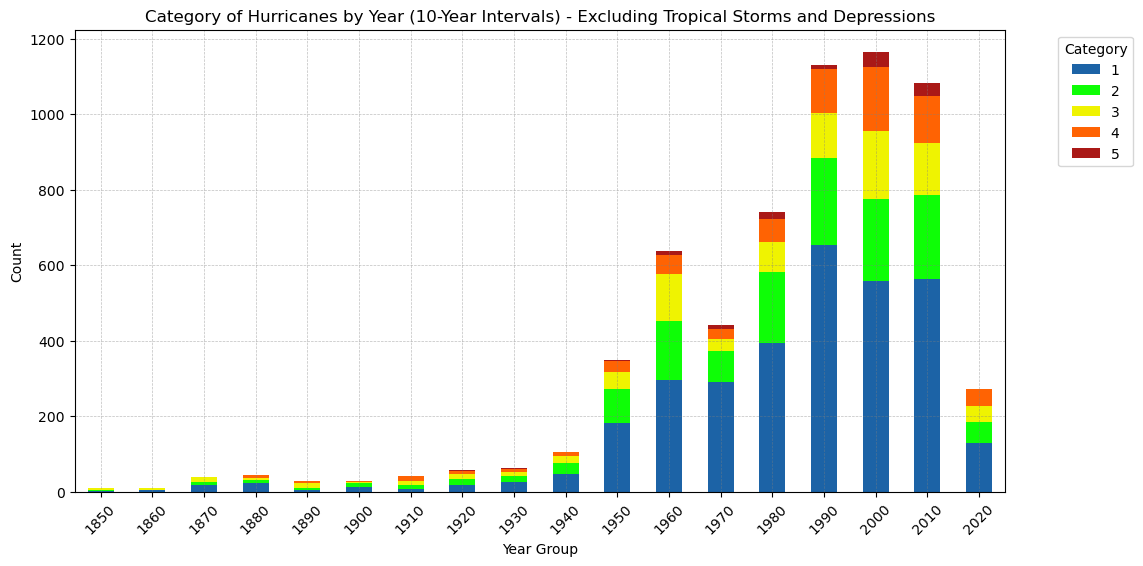

In [11]:
# Filter the original data to create the 'filtered_data' DataFrame
filtered_data = storms_df[storms_df['status'].isin(['hurricane'])]

# Create 10-year intervals for grouping hurricanes by year
filtered_data['year_group'] = (filtered_data['year'] // 10) * 10

# Calculate category counts by year for hurricanes only
category_counts_by_year = filtered_data.groupby(['year_group', 'category']).size().unstack()

# Define custom colors for the bars and reverse the order
colors = ['#aa1917', '#ff6303', '#eff301', '#0efe06', '#1c63a6'][::-1]

# Plotting the bar graph for comparing categories of hurricanes by year using 10-year intervals with reversed colors
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
category_counts_by_year.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

plt.title('Category of Hurricanes by Year (10-Year Intervals) - Excluding Tropical Storms and Depressions')
plt.xlabel('Year Group')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()